# Housing Price Project
## Overview
The goal of this project is to predict the housing sale prices in King County through a regression model. This prediction can give the seller and buyer an estimate of the housing price in King County and how specific features can affect the sale price. Based on this estimation, the buyers can find a house according to their budget, and the homeowners can get an evaluation of their house value, maybe renovate it before selling.


## Business Problem

The king county real estate agency will use this prediction model to give their clients an estimate of the housing price when purchasing or selling houses. The agency will estimate the price based on certain features like the location of the house, the number of bedrooms, and the size of the house.


## Data Understanding

The king county dataset was provided to me as part of this project by Flatiron School. The dataset consists of 21597 rows, 21 columns with different house features (continuous and categorical). These features will help to understand which factor will affect the selling price. Below is the description of each variable in the data frame:



- price - Price of the house sold, prediction target

- id - unique identified for a house

- date - the date when the house was sold
- bedrooms - number of bedrooms
- bathrooms - number of bathrooms
- sqft_living - square footage of the house’s interior living space
- sqft_lots - square footage of the land
- floors - number of floors
- waterfront - House which has a view to a waterfront
- view - Has been viewed by potential buyers
- condition - condition of the house coded from 1 to 5 where 1: Poor Worn out, and 5:Very Good
- grade - index from 1 to 13, where 1–3 falls short of building construction and design, 7 has an average level of construction and design, and 11–13 have a high quality level of construction and design
- sqft_above  square footage of house apart from basement
- sqft_basement - square footage of the basement
- yr_built - the year where the house was built
- yr_renovated - Year when house was renovated, and if not 0
- zipcode - zip code
- lat - Latitude coordinate
- long - Longitude coordinate
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors




In [1]:
# Imports the necessary libraries
import pandas as pd
import numpy as np
# Setting random seed for reproducibility
np.random.seed(1000)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


pd.options.display.max_rows=300

import utils as ut

import warnings
warnings.filterwarnings('ignore')

## Obtain the data

In [2]:
# read in the data
df = pd.read_csv("data/kc_house_data.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#### - from the above data information, I noticed that the following:
#### - date in not in datetime format
#### - sqft_basement is an object need to see why and turn it to numerical

In [4]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
sqft_above,21597.0,1.788597e+03,8.277598e+02,3.700000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
yr_built,21597.0,1.971000e+03,2.937523e+01,1.900000e+03,1.951000e+03,1.975000e+03,1.997000e+03,2.015000e+03
yr_renovated,17755.0,8.363678e+01,3.999464e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015000e+03


## Scrub the data


In [5]:
# check if we have duplicate house
df[['id']].duplicated().sum() # check if we have duplicate houses


177

In [6]:
df["id"].drop_duplicates(inplace=True) 


In [7]:
df.drop_duplicates(subset=['id'], inplace=True)

In [8]:
df["id"].duplicated().any() #sanity check


False

In [9]:
# check for null alues n the data
df.isnull().sum() # check for null values in the data


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [10]:
# I'll check the null in waterfront and yr_renovated, and drop the view from the data
#because it is not important if the house was viewed or not

In [11]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [13]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [14]:
def waterfront11(x):
    if x == "NO":
        return 0
    if x == "YES":
        return 1
    

In [15]:
df["waterfront1"] = df["waterfront"].apply(waterfront11)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,NaN
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,NaN


In [16]:
df["waterfront1"] = df["waterfront1"].fillna(0)

In [17]:
df["waterfront1"].value_counts(dropna=False)

0.0    21274
1.0      146
Name: waterfront1, dtype: int64

In [18]:
df.drop("waterfront", axis=1,inplace=True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NONE,Average,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NONE,Average,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NONE,Average,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NONE,Average,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NONE,Average,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NONE,Average,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NONE,Average,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NONE,Average,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0


In [19]:
df['condition1'] = df['condition'].map(lambda x: len(x.split()))
df.head(50)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1,condition1
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NONE,Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NONE,Average,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NONE,Average,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NONE,Average,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,1
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NONE,Average,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,0.0,1
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NONE,Average,...,?,1995,0.0,98003,47.3097,-122.327,2238,6819,0.0,1
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NaN,Average,...,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,0.0,1
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NONE,Average,...,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,0.0,1
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NONE,Average,...,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,0.0,1


In [20]:
df.drop("condition", axis=1,inplace=True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1,condition1
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NONE,7 Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NONE,7 Average,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NONE,6 Low Average,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NONE,7 Average,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NONE,8 Good,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NONE,8 Good,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0,1
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NONE,8 Good,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0,1
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NONE,7 Average,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0,1
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NONE,8 Good,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0,1


In [21]:
df.fillna(0)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1,condition1
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NONE,7 Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NONE,7 Average,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NONE,6 Low Average,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NONE,7 Average,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NONE,8 Good,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NONE,8 Good,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0,1
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NONE,8 Good,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0,1
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NONE,7 Average,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0,1
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NONE,8 Good,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0,1


In [22]:
df["view"].value_counts(dropna=False)

NONE         19253
AVERAGE        956
GOOD           505
FAIR           329
EXCELLENT      314
NaN             63
Name: view, dtype: int64

In [23]:
def view(x):
    if x == "NONE":
        return 0
    if x == "AVERAGE":
        return 2
    if x == "GOOD":
        return 3
    if x == "FAIR":
        return 1
    if x == "EXCELLENT":
        return 4

In [24]:
df["view"] = df["view"].apply(view)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1,condition1
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,7 Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,7 Average,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,6 Low Average,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,7 Average,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,8 Good,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,8 Good,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0,1
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,8 Good,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0,1
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,7 Average,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0,1
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,8 Good,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0,1


In [25]:
df.head(200)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1,condition1
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,7 Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,7 Average,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,6 Low Average,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,7 Average,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,8 Good,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,1
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,11 Excellent,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,0.0,1
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,7 Average,...,?,1995,0.0,98003,47.3097,-122.327,2238,6819,0.0,1
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NaN,7 Average,...,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,0.0,1
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,7 Average,...,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,0.0,1
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,7 Average,...,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,0.0,1


In [26]:
df.grade=df.grade.replace(['7 Average','8 Good','9 Better','6 Low Average','10 Very Good','11 Excellent','5 Fair','12 Luxury','4 Low','13 Mansion','3 Poor'],
                [7,8,9,6,10,11,5,12,4,13,3])

In [27]:
df["grade"].value_counts(dropna=False)

7     8889
8     6041
9     2606
6     1995
10    1130
11     396
5      234
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [28]:
df['grade'] = df['grade'].astype(float)


In [29]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1,condition1
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,7.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,7.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,6.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,7.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,8.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,8.0,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0,1
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,8.0,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0,1
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,7.0,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0,1
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,8.0,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0,1


In [30]:
#df['grade'] = df['grade'].map(lambda x: len(x.split()))


In [31]:
df["grade"].value_counts(dropna=False)

7.0     8889
8.0     6041
9.0     2606
6.0     1995
10.0    1130
11.0     396
5.0      234
12.0      88
4.0       27
13.0      13
3.0        1
Name: grade, dtype: int64

In [32]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1,condition1
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,7.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,7.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,6.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,7.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,8.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,8.0,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0,1
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,8.0,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0,1
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,7.0,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0,1
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,8.0,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0,1


In [40]:
df["yr_renovated"] = df["yr_renovated"].fillna(value = 0) 
# I filled the null with 0 because I think null here means not renovated
df["yr_renovated"].unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [41]:
df["sqft_basement"].unique()
#checking what is making sqft_basement an object
df["sqft_basement"].value_counts()

0.0       12717
?           452
600.0       216
500.0       206
700.0       205
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [42]:
df["sqft_basement"] = df["sqft_basement"].replace("?", 0).astype(float)
#replace the ? with 0 and change it to float type
df["sqft_basement"].value_counts()


0.0       13169
600.0       216
500.0       206
700.0       205
800.0       201
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [43]:
df.isnull().sum()
#sanity check

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
view             63
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
waterfront1       0
condition1        0
dtype: int64

In [44]:
df = df.drop(["id","date","view"], axis = 1)

# drop unwanted columns. id: there is no use of the id in the model,
#same as the selling date, and I don't need  view if the house has been viewed or not 


In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21420.0,540739.303922,367931.109953,78000.0000,322500.0000,450000.0000,645000.0000,7.700000e+06
bedrooms,21420.0,3.373950,0.925405,1.0000,3.0000,3.0000,4.0000,3.300000e+01
bathrooms,21420.0,2.118429,0.768720,0.5000,1.7500,2.2500,2.5000,8.000000e+00
sqft_living,21420.0,2083.132633,918.808412,370.0000,1430.0000,1920.0000,2550.0000,1.354000e+04
sqft_lot,21420.0,15128.038002,41530.796838,520.0000,5040.0000,7614.0000,10690.5000,1.651359e+06
floors,21420.0,1.495985,0.540081,1.0000,1.0000,1.5000,2.0000,3.500000e+00
grade,21420.0,7.662792,1.171971,3.0000,7.0000,7.0000,8.0000,1.300000e+01
sqft_above,21420.0,1791.170215,828.692965,370.0000,1200.0000,1560.0000,2220.0000,9.410000e+03
sqft_basement,21420.0,285.904342,440.008202,0.0000,0.0000,0.0000,550.0000,4.820000e+03
yr_built,21420.0,1971.092997,29.387141,1900.0000,1952.0000,1975.0000,1997.0000,2.015000e+03


In [46]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1,condition1
0,221900.0,3,1.00,1180,5650,1.0,7.0,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,1
1,538000.0,3,2.25,2570,7242,2.0,7.0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0,1
2,180000.0,2,1.00,770,10000,1.0,6.0,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0,1
3,604000.0,4,3.00,1960,5000,1.0,7.0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2
4,510000.0,3,2.00,1680,8080,1.0,8.0,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,8.0,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0,1
21593,400000.0,4,2.50,2310,5813,2.0,8.0,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0,1
21594,402101.0,2,0.75,1020,1350,2.0,7.0,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0,1
21595,400000.0,3,2.50,1600,2388,2.0,8.0,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0,1


In [47]:
#I will set a range for each feature and get rid of outliers, I will look at it through plots and the stat information
#from .describe

<AxesSubplot:ylabel='Density'>

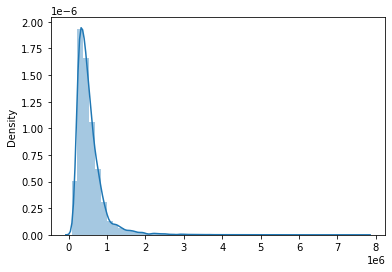

In [48]:
ut.plot(df,["price"])


In [49]:
df=df[(df['price'] < 12000000) & (df['price'] >100000)] # limiting my price range
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1,condition1
0,221900.0,3,1.00,1180,5650,1.0,7.0,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,1
1,538000.0,3,2.25,2570,7242,2.0,7.0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0,1
2,180000.0,2,1.00,770,10000,1.0,6.0,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0,1
3,604000.0,4,3.00,1960,5000,1.0,7.0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2
4,510000.0,3,2.00,1680,8080,1.0,8.0,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,8.0,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0,1
21593,400000.0,4,2.50,2310,5813,2.0,8.0,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0,1
21594,402101.0,2,0.75,1020,1350,2.0,7.0,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0,1
21595,400000.0,3,2.50,1600,2388,2.0,8.0,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0,1


<AxesSubplot:ylabel='Density'>

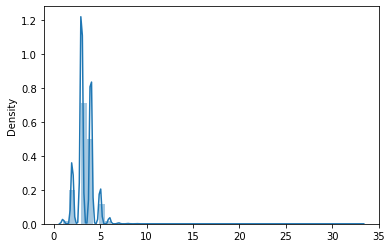

In [50]:
ut.plot(df,["bedrooms"])

In [51]:
df=df[(df['bedrooms']<6)]
# remove the outliner

<AxesSubplot:ylabel='Density'>

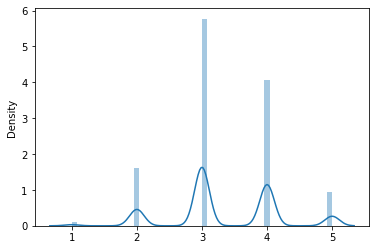

In [52]:
ut.plot(df,['bedrooms'])

<AxesSubplot:ylabel='Density'>

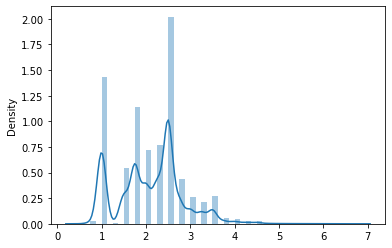

In [53]:
ut.plot(df,['bathrooms'])

In [54]:
df=df[(df['bathrooms']<4.5)]
#remove the outliner

<AxesSubplot:ylabel='Density'>

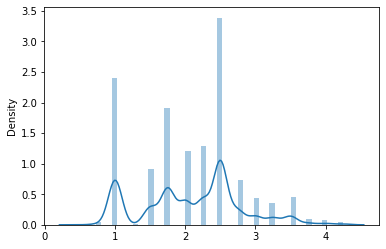

In [55]:
ut.plot(df,['bathrooms'])

<AxesSubplot:ylabel='Density'>

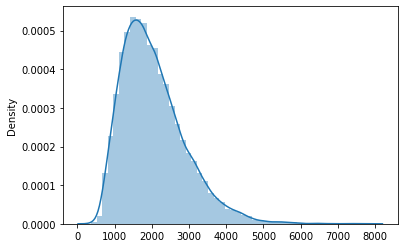

In [56]:
ut.plot(df,['sqft_living'])

In [57]:
df=df[(df["sqft_living"]<3500)]

<AxesSubplot:ylabel='Density'>

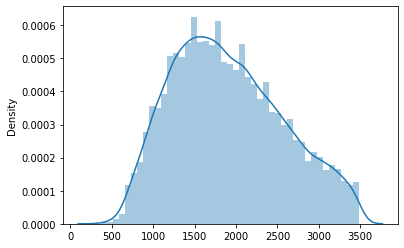

In [58]:
ut.plot(df,["sqft_living"])

<AxesSubplot:ylabel='Density'>

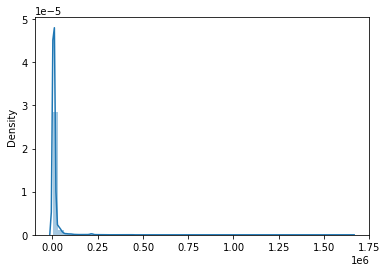

In [59]:
ut.plot(df,["sqft_lot"])

In [60]:
df=df[(df["sqft_lot"]<20000)]

<AxesSubplot:ylabel='Density'>

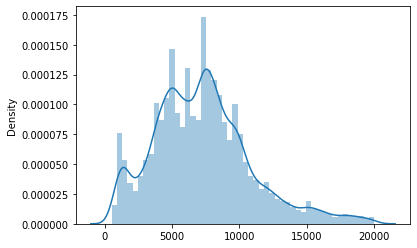

In [61]:
ut.plot(df,["sqft_lot"])

<AxesSubplot:ylabel='Density'>

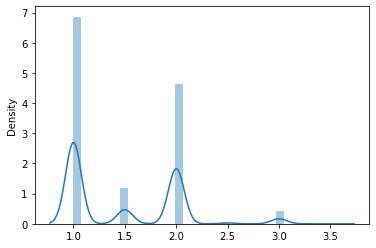

In [62]:
ut.plot(df,['floors'])

In [63]:
df=df[(df["floors"]<3.5)]

<AxesSubplot:ylabel='Density'>

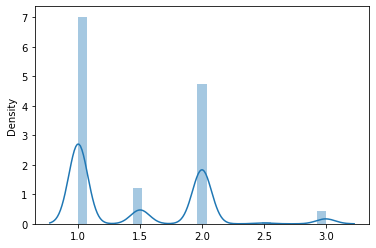

In [64]:
ut.plot(df,["floors"])

In [65]:
df["condition1"].unique()


array([1, 2])

list = []
for i in list:
    

df["grade"].unique()


<AxesSubplot:ylabel='Density'>

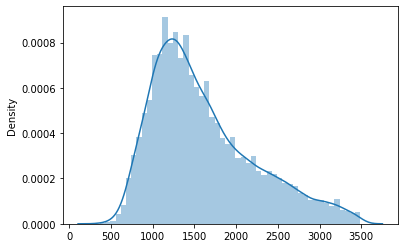

In [66]:
ut.plot(df,["sqft_above"])


In [67]:
df["sqft_above"].value_counts().sort_values(ascending=True)


1425      1
3087      1
2198      1
1333      1
2531      1
       ... 
1140    169
1220    173
1200    190
1010    194
1300    195
Name: sqft_above, Length: 658, dtype: int64

In [68]:
df=df[(df['sqft_above'] <2900)]


<AxesSubplot:ylabel='Density'>

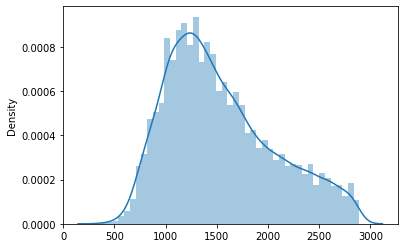

In [69]:
ut.plot(df,["sqft_above"])

<AxesSubplot:ylabel='Density'>

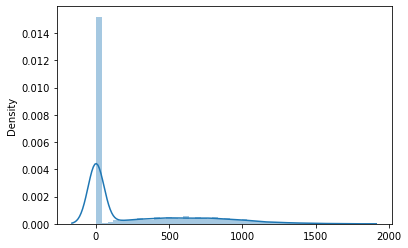

In [70]:
ut.plot(df,["sqft_basement"])

In [71]:
df["sqft_basement"].value_counts().sort_values(ascending=True)

248.0         1
207.0         1
283.0         1
556.0         1
266.0         1
143.0         1
65.0          1
508.0         1
10.0          1
516.0         1
862.0         1
602.0         1
20.0          1
274.0         1
276.0         1
176.0         1
295.0         1
225.0         1
172.0         1
1730.0        1
792.0         1
1620.0        1
1630.0        1
652.0         1
415.0         1
1525.0        1
518.0         1
861.0         1
906.0         1
784.0         1
1750.0        1
1135.0        1
1710.0        1
704.0         1
875.0         1
506.0         1
243.0         1
235.0         2
435.0         2
1520.0        2
515.0         2
1660.0        2
1690.0        2
414.0         2
1530.0        2
1560.0        2
1680.0        2
1570.0        2
1700.0        2
1720.0        2
265.0         3
1610.0        3
1490.0        3
1600.0        4
1550.0        4
1480.0        4
40.0          4
1540.0        5
1650.0        5
145.0         5
1430.0        5
1510.0        5
1470.0  

In [72]:
df=df[(df["sqft_basement"]<1200)]

<AxesSubplot:ylabel='Density'>

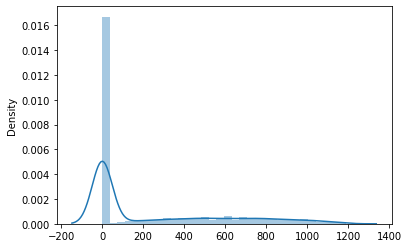

In [73]:
ut.plot(df,["sqft_basement"])

In [74]:
df["yr_built"].value_counts().sort_values(ascending=True)

1935     16
1934     16
1933     17
1902     25
1901     25
1932     26
2015     27
1936     30
1938     39
1904     42
1903     43
1913     46
1914     49
1931     50
1917     51
1937     53
1915     55
1907     57
1911     63
1905     64
1921     65
1912     69
1916     71
1982     71
1900     73
1923     75
1930     77
1908     78
1919     80
1922     82
1971     82
1945     83
1906     83
1909     87
1939     89
1970     91
1920     91
1995    102
1973    103
1927    104
2011    107
1918    108
1929    108
1997    110
1946    113
1928    114
1972    115
2010    116
1910    120
1996    120
1974    123
1924    127
2000    128
1964    128
1991    129
1944    132
2012    133
1992    136
1940    137
1993    139
2013    140
1965    141
1925    146
1941    147
1975    149
1980    149
1943    150
1981    151
1998    153
1983    155
1985    156
2002    156
1986    157
1984    159
1957    163
1958    164
1949    164
1926    167
1956    172
1976    175
1988    179
1994    180
1999    181
1953

<AxesSubplot:ylabel='Density'>

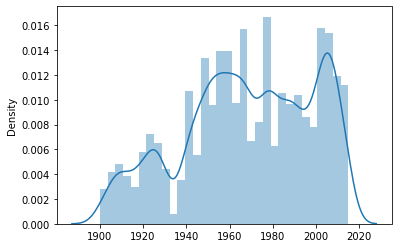

In [75]:
ut.plot(df,["yr_built"])

In [76]:
df["yr_renovated"].value_counts().sort_values(ascending=True)

1957.0        1
1934.0        1
1959.0        1
1944.0        1
1948.0        1
1946.0        1
1950.0        1
1953.0        1
1962.0        1
1951.0        1
1971.0        1
1976.0        1
1955.0        2
1960.0        2
1940.0        2
1967.0        2
1981.0        2
1972.0        2
1974.0        2
1956.0        2
1965.0        3
1963.0        3
1978.0        3
1958.0        3
1945.0        3
1964.0        3
1975.0        3
1969.0        3
1973.0        3
1982.0        4
1977.0        4
1968.0        4
1980.0        5
1979.0        5
1995.0        6
2015.0        7
1970.0        7
2012.0        7
1992.0        7
1998.0        8
1996.0        8
1987.0        8
1999.0        8
2011.0        9
1985.0        9
1994.0        9
1986.0        9
2010.0        9
1988.0       10
2001.0       10
1993.0       10
1997.0       10
1990.0       10
2008.0       11
2002.0       11
1984.0       11
1991.0       12
1989.0       13
1983.0       13
2006.0       15
2007.0       16
2009.0       16
2004.0  

In [77]:
df["renovated"]= df["yr_renovated"].apply(lambda x:1 if x!=0 else 0)
# assign the value in the "yr_renovated" columns to binary value if it is renovated or not,then drop "yr_renovated"


In [78]:
df["renovated"].value_counts()

0    16011
1      520
Name: renovated, dtype: int64

In [79]:
df =df.drop(["yr_renovated"],axis=1)

#drop "yr_renovated"

<AxesSubplot:ylabel='Density'>

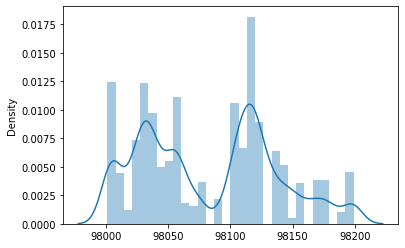

In [80]:
ut.plot(df,['zipcode'])

In [81]:
df['zipcode'].value_counts()

98103    571
98115    535
98117    519
98034    463
98133    458
98118    457
98038    448
98023    419
98052    411
98042    406
98155    388
98125    366
98058    354
98126    339
98056    333
98106    311
98144    305
98116    304
98059    299
98033    297
98001    290
98122    271
98006    266
98074    261
98029    258
98146    256
98199    254
98107    251
98003    244
98136    242
98031    240
98198    239
98178    236
98092    236
98168    228
98055    227
98008    227
98028    226
98030    225
98027    210
98112    207
98065    197
98053    192
98166    191
98105    188
98002    185
98177    183
98108    172
98119    168
98004    167
98011    157
98022    145
98072    139
98045    135
98040    134
98019    128
98188    117
98075    110
98032    104
98007    104
98005     99
98109     99
98102     90
98148     53
98014     50
98010     50
98077     29
98070     28
98024     25
98039     15
Name: zipcode, dtype: int64

In [82]:
df['zipcode'].nunique()

70

<AxesSubplot:ylabel='Density'>

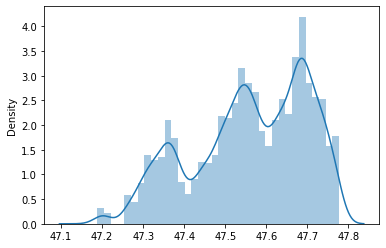

In [83]:
ut.plot(df,['lat'])

<AxesSubplot:ylabel='Density'>

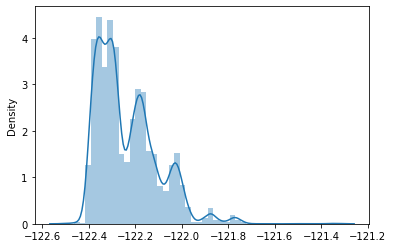

In [84]:
ut.plot(df,['long'])

<AxesSubplot:ylabel='Density'>

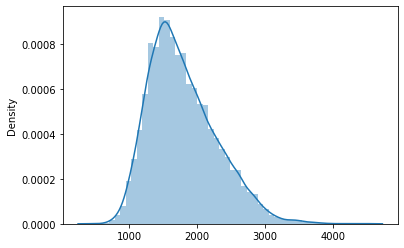

In [85]:
ut.plot(df,['sqft_living15'])

In [86]:
df=df[(df['sqft_living15']<3400)]

<AxesSubplot:ylabel='Density'>

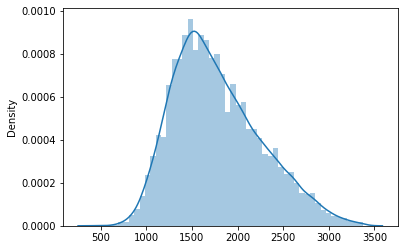

In [87]:
ut.plot(df,['sqft_living15'])

<AxesSubplot:ylabel='Density'>

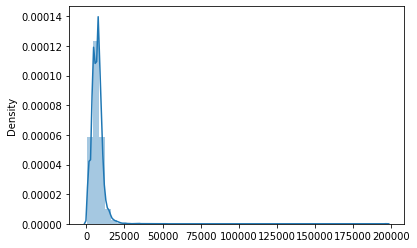

In [88]:
ut.plot(df,["sqft_lot15"])

In [89]:
df=df[(df["sqft_lot15"]<8000)]

<AxesSubplot:ylabel='Density'>

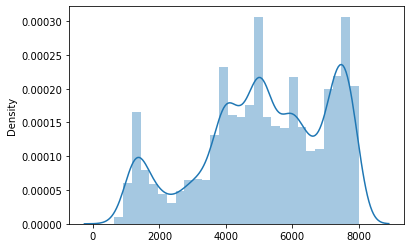

In [90]:
ut.plot(df,["sqft_lot15"])

## Explore the data

In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,10529.0,466858.469655,217031.551785,102500.0000,315000.0000,425000.0000,565997.0000,2.580000e+06
bedrooms,10529.0,3.124513,0.811660,1.0000,3.0000,3.0000,4.0000,5.000000e+00
bathrooms,10529.0,1.979224,0.686776,0.5000,1.5000,2.0000,2.5000,4.250000e+00
sqft_living,10529.0,1733.007978,578.861277,370.0000,1290.0000,1670.0000,2130.0000,3.490000e+03
sqft_lot,10529.0,5249.797037,2384.637208,520.0000,3800.0000,5120.0000,6994.0000,1.996900e+04
floors,10529.0,1.560737,0.570238,1.0000,1.0000,1.5000,2.0000,3.000000e+00
grade,10529.0,7.351125,0.876973,4.0000,7.0000,7.0000,8.0000,1.100000e+01
sqft_above,10529.0,1505.343717,538.305979,370.0000,1080.0000,1400.0000,1850.0000,2.890000e+03
sqft_basement,10529.0,222.150917,332.701595,0.0000,0.0000,0.0000,420.0000,1.190000e+03
yr_built,10529.0,1967.776712,34.754510,1900.0000,1941.0000,1971.0000,2003.0000,2.015000e+03


In [92]:
df.shape

(10529, 18)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10529 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          10529 non-null  float64
 1   bedrooms       10529 non-null  int64  
 2   bathrooms      10529 non-null  float64
 3   sqft_living    10529 non-null  int64  
 4   sqft_lot       10529 non-null  int64  
 5   floors         10529 non-null  float64
 6   grade          10529 non-null  float64
 7   sqft_above     10529 non-null  int64  
 8   sqft_basement  10529 non-null  float64
 9   yr_built       10529 non-null  int64  
 10  zipcode        10529 non-null  int64  
 11  lat            10529 non-null  float64
 12  long           10529 non-null  float64
 13  sqft_living15  10529 non-null  int64  
 14  sqft_lot15     10529 non-null  int64  
 15  waterfront1    10529 non-null  float64
 16  condition1     10529 non-null  int64  
 17  renovated      10529 non-null  int64  
dtypes: flo

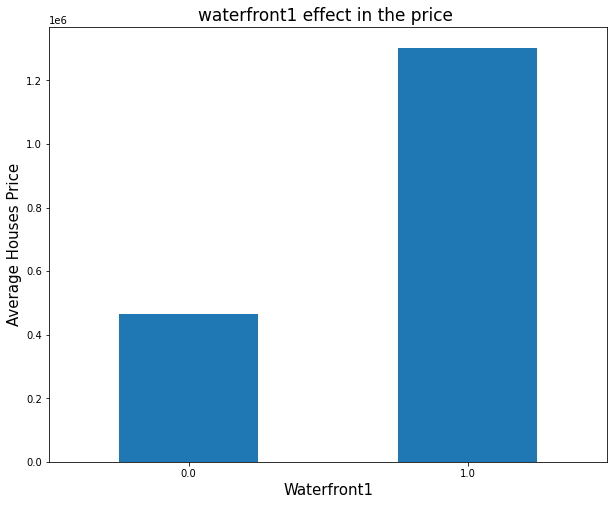

In [94]:
# plotting houses to the mean of price
df.groupby("waterfront1")["price"].mean().plot(kind="bar",figsize=(10,8));
plt.title("waterfront1 effect in the price ", fontsize=17)
plt.ylabel("Average Houses Price",fontsize=15)
plt.xlabel("Waterfront1",fontsize=15)
plt.xticks(rotation=0)
plt.show()
#the houses with waterfront selling price are higher than one without waterfront

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

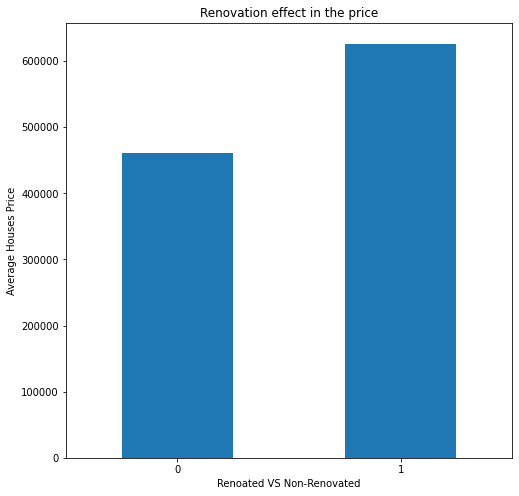

In [95]:
# plotting houses to the mean of price
df.groupby("renovated")["price"].mean().plot(kind="bar",figsize=(8,8));
plt.title("Renovation effect in the price")
plt.ylabel("Average Houses Price")
plt.xlabel("Renoated VS Non-Renovated")
plt.xticks(rotation=0)


#the renovated houses selling price is higher than non-renovated one



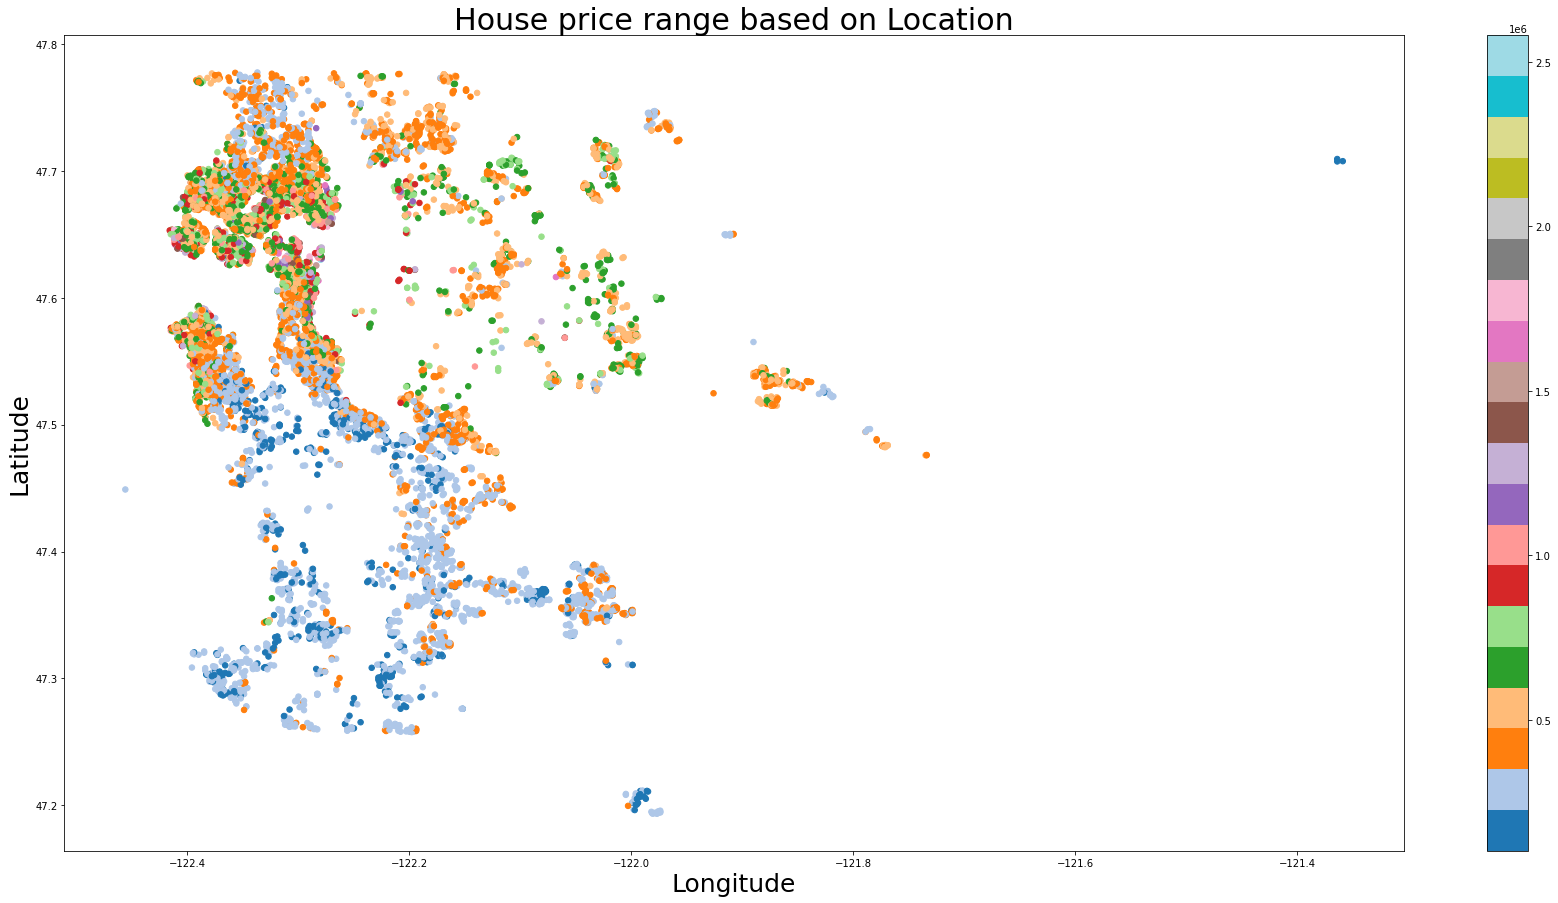

In [96]:
#Visualizing Longitude to Latitude to check how the price vary by location

plt.figure(figsize=(30,15))
plt.scatter(x=df['long'], y=df['lat'], c =df["price"], cmap='tab20',marker='o', s=30)
plt.title("House price range based on Location", fontsize=30)
plt.xlabel('Longitude', fontsize=25)
plt.ylabel("Latitude", fontsize=25)
plt.colorbar()
plt.show()
# #visualize relationships between numeric columns
#sns.pairplot(df)

In [97]:
#check for multicollinearity between other variables
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1,condition1,renovated
price,1.000000,0.217635,0.316676,0.524187,-0.119704,0.199558,0.545287,0.367255,0.307694,-0.149486,0.183199,0.448126,-0.147717,0.390720,-0.148172,0.092035,0.116600,0.136677
bedrooms,0.217635,1.000000,0.459647,0.620960,0.199903,0.160663,0.274848,0.514048,0.240133,0.122484,-0.158983,-0.126717,0.150683,0.376324,0.189503,-0.013470,0.048797,0.019641
bathrooms,0.316676,0.459647,1.000000,0.674282,-0.133333,0.544056,0.577811,0.611275,0.178605,0.546071,-0.240784,-0.092086,0.267263,0.472416,-0.146611,0.013761,-0.034529,0.036016
sqft_living,0.524187,0.620960,0.674282,1.000000,0.147021,0.315873,0.596588,0.822041,0.397831,0.249853,-0.174464,-0.059186,0.235449,0.671648,0.123844,0.020846,0.021195,0.054588
sqft_lot,-0.119704,0.199903,-0.133333,0.147021,1.000000,-0.460309,-0.161140,0.120000,0.060177,-0.167701,-0.175007,-0.215156,0.165764,0.150245,0.824939,-0.008139,0.043614,-0.001758
floors,0.199558,0.160663,0.544056,0.315873,-0.460309,1.000000,0.499053,0.509824,-0.268194,0.540712,-0.117675,0.006946,0.144362,0.240301,-0.485599,0.014905,-0.137415,-0.015177
grade,0.545287,0.274848,0.577811,0.596588,-0.161140,0.499053,1.000000,0.595322,0.072867,0.437738,-0.101338,0.076838,0.119069,0.518169,-0.166156,0.017669,-0.097227,0.029163
sqft_above,0.367255,0.514048,0.611275,0.822041,0.120000,0.509824,0.595322,1.000000,-0.183411,0.411692,-0.325272,-0.153562,0.411216,0.672670,0.097860,0.017581,-0.087261,0.009808
sqft_basement,0.307694,0.240133,0.178605,0.397831,0.060177,-0.268194,0.072867,-0.183411,1.000000,-0.225055,0.217788,0.140180,-0.248293,0.079206,0.055681,0.008219,0.170732,0.076600
yr_built,-0.149486,0.122484,0.546071,0.249853,-0.167701,0.540712,0.437738,0.411692,-0.225055,1.000000,-0.387199,-0.239252,0.439478,0.270059,-0.156113,-0.000419,-0.267731,-0.201825


In [98]:
#set 0.75 high correlaion as a cut-off
abs(df.corr()) >0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront1,condition1,renovated
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


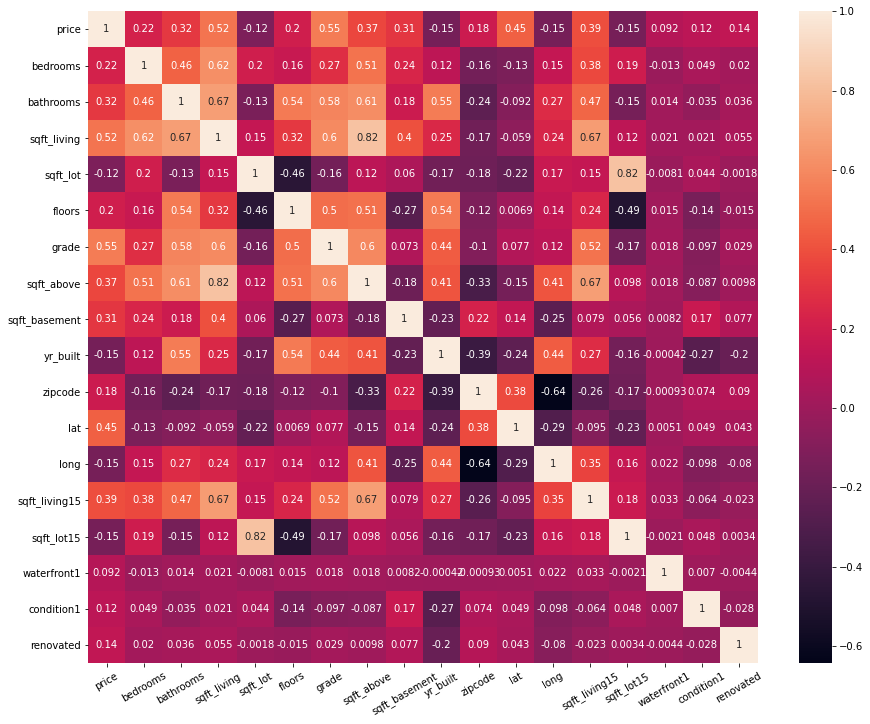

In [99]:
# visualize correlations between numeric columns to check if there is any multicollinearity between the variables
plt.figure(figsize=(15,12))
ax = sns.heatmap(df.corr(),annot=True)
plt.xticks(rotation=30)
plt.show()

In [100]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df3=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df3['pairs'] = list(zip(df3.level_0, df3.level_1))

# set index to pairs
df3.set_index(['pairs'], inplace = True)

#d rop level columns
df3.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df3.columns = ['cc']

# drop duplicates.
df3.drop_duplicates(inplace=True)
df3.head()

,cc
pairs,
"(price, price)",1.000000
"(sqft_lot, sqft_lot15)",0.824939
"(sqft_above, sqft_living)",0.822041
"(sqft_living, bathrooms)",0.674282
"(sqft_living15, sqft_above)",0.672670


In [101]:
df3[(df3.cc>.75) & (df3.cc <1)]
#assingning the range for unwanted correlation

,cc
pairs,
"(sqft_lot, sqft_lot15)",0.824939
"(sqft_above, sqft_living)",0.822041


In [102]:
df = df.drop(["sqft_lot15","sqft_above"],axis =1) 

# drop columns that cause high correlation so won't mess up my model
# for sqft_lot, sqft_lot15: i dropped sqft_lot15 because it makes more sense to drop The square footage of the 
#land lots of the nearest 15 neighbors
# for sqft_above, sqft_living: i dropped the sqft_above because the square footage of the house’s interior
#living space is more important than the qft_above basement

In [103]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,waterfront1,condition1,renovated
price,1.000000,0.217635,0.316676,0.524187,-0.119704,0.199558,0.545287,0.307694,-0.149486,0.183199,0.448126,-0.147717,0.390720,0.092035,0.116600,0.136677
bedrooms,0.217635,1.000000,0.459647,0.620960,0.199903,0.160663,0.274848,0.240133,0.122484,-0.158983,-0.126717,0.150683,0.376324,-0.013470,0.048797,0.019641
bathrooms,0.316676,0.459647,1.000000,0.674282,-0.133333,0.544056,0.577811,0.178605,0.546071,-0.240784,-0.092086,0.267263,0.472416,0.013761,-0.034529,0.036016
sqft_living,0.524187,0.620960,0.674282,1.000000,0.147021,0.315873,0.596588,0.397831,0.249853,-0.174464,-0.059186,0.235449,0.671648,0.020846,0.021195,0.054588
sqft_lot,-0.119704,0.199903,-0.133333,0.147021,1.000000,-0.460309,-0.161140,0.060177,-0.167701,-0.175007,-0.215156,0.165764,0.150245,-0.008139,0.043614,-0.001758
floors,0.199558,0.160663,0.544056,0.315873,-0.460309,1.000000,0.499053,-0.268194,0.540712,-0.117675,0.006946,0.144362,0.240301,0.014905,-0.137415,-0.015177
grade,0.545287,0.274848,0.577811,0.596588,-0.161140,0.499053,1.000000,0.072867,0.437738,-0.101338,0.076838,0.119069,0.518169,0.017669,-0.097227,0.029163
sqft_basement,0.307694,0.240133,0.178605,0.397831,0.060177,-0.268194,0.072867,1.000000,-0.225055,0.217788,0.140180,-0.248293,0.079206,0.008219,0.170732,0.076600
yr_built,-0.149486,0.122484,0.546071,0.249853,-0.167701,0.540712,0.437738,-0.225055,1.000000,-0.387199,-0.239252,0.439478,0.270059,-0.000419,-0.267731,-0.201825
zipcode,0.183199,-0.158983,-0.240784,-0.174464,-0.175007,-0.117675,-0.101338,0.217788,-0.387199,1.000000,0.381182,-0.643643,-0.258999,-0.000928,0.074195,0.089591


## Model
### Baselne Model

In [104]:
# set  X and y
X = df.drop('price', axis=1)
y = df['price']

In [105]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# Instantiate a scaler
scaler = StandardScaler()

# train on train data
scaler.fit(X_train)
# transform both train and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [107]:
# Instantiate a linear regression model
lr = LinearRegression()
# Fit our model on our scaled data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [108]:
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

In [109]:
# Evaluate
ut.evaluate_model(y_train, y_test, y_train_pred, y_test_pred)


Train R2: 0.672
Test R2: 0.687
---
Train MAE: 88905.328
Test MAE: 89051.591
---
Train RMSE: 123298.817
Test RMSE: 125355.358


In [110]:
#the baseline model can predict 66 % variance in the price and approximately my model is $88,000 off (MAE), 
#and for root square error we have about $126000 off because root square error is bigger than MAE

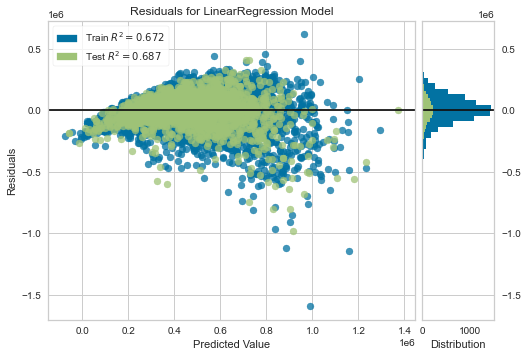

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [111]:
# visualizing our residuals
# https://www.scikit-yb.org/en/latest/api/regressor/residuals.html

from yellowbrick.regressor import ResidualsPlot


visualizer = ResidualsPlot(lr)

visualizer.fit(X_train_scaled, y_train)
#fit the traning data to the visualizer

visualizer.score(X_test_scaled, y_test)
#Evaluate the model on the test data
visualizer.show()


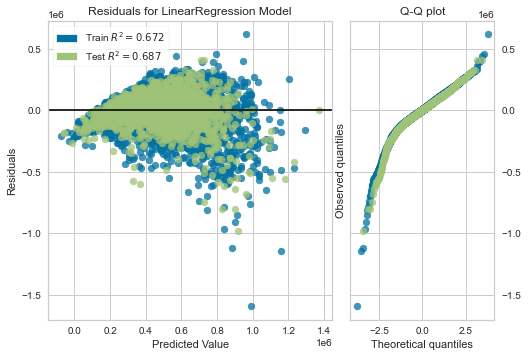

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [112]:
visualizer = ResidualsPlot(lr, hist=False, qqplot=True)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

In [113]:
# The predicted values of the baseline model are not equally scattered, has a cone shape, so it is heteroscedastic


In [114]:
# examine the relationship of each of the following feature against the price by using regplot


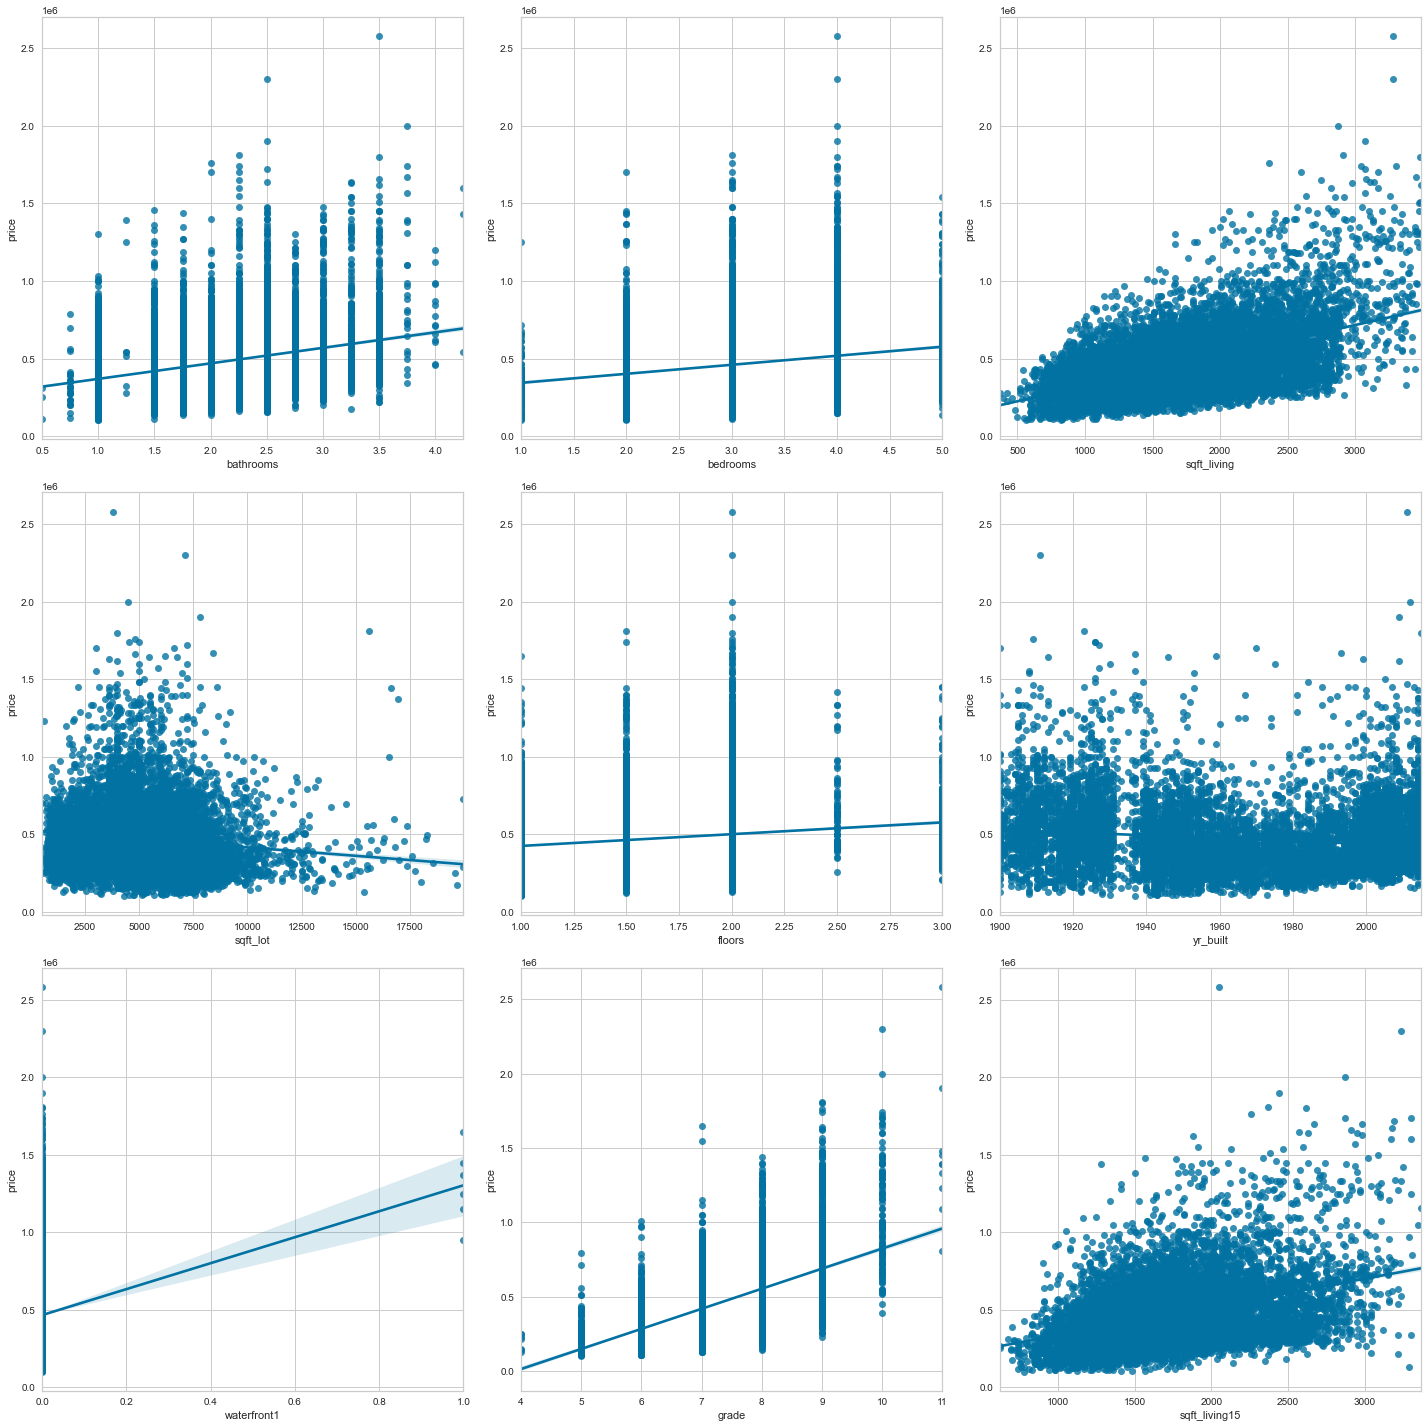

In [115]:
fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize = (20, 20))
sns.regplot(y = df['price'], x = X['bathrooms'], ax = axs[0, 0])
sns.regplot(y = df['price'], x = X['bedrooms'], ax = axs[0, 1])
sns.regplot(y = df['price'], x = X['sqft_living'], ax = axs[0, 2])
sns.regplot(y = df['price'], x = X['sqft_lot'], ax = axs[1, 0])
sns.regplot(y = df['price'], x = X['floors'], ax = axs[1, 1])
sns.regplot(y = df['price'], x = X['yr_built'], ax = axs[1, 2])
sns.regplot(y = df['price'], x = X['waterfront1'], ax = axs[2, 0])
sns.regplot(y = df['price'], x = X['grade'], ax = axs[2, 1])
sns.regplot(y = df['price'], x = X['sqft_living15'], ax = axs[2, 2])
plt.tight_layout()

In [116]:
# the best fit line is not clear in year built
# floors and sqft_lot are not linearly related to the price

## Second Model

In [117]:
from sklearn.preprocessing import PolynomialFeatures

In [118]:
# copy of the original dataframe
df5 = df.copy()
X5 = df.drop("price", axis=1)
y5 = df["price"]
# train test split
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2, random_state=42)

In [119]:
# Instantiate PolynominalFeatures
poly = PolynomialFeatures(degree=2, interaction_only=False)


In [120]:
# Fit and transform X_train
poly.fit(X_train5)
X_train_poly = poly.transform(X_train5)
X_test_poly = poly.transform(X_test5)

In [121]:
# Instantiate MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform X_train_poly
scaler.fit(X_train_poly)

X_train_poly_sc = scaler.transform(X_train_poly)
X_test_poly_sc = scaler.transform(X_test_poly)



In [122]:
# Instantiate and fit a linear regression model to the polynomial transformed scaled train 
lr = LinearRegression()

lr.fit(X_train_poly_sc, y_train5)
# grab predictions for train and test set
y_train_poly_preds = lr.predict(X_train_poly_sc)
y_test_poly_preds = lr.predict(X_test_poly_sc)



In [123]:
# Evaluate
ut.evaluate_model(y_train5,y_test5,y_train_poly_preds, y_test_poly_preds)


Train R2: 0.760
Test R2: 0.770
---
Train MAE: 74780.242
Test MAE: 75661.596
---
Train RMSE: 105485.365
Test RMSE: 107607.811


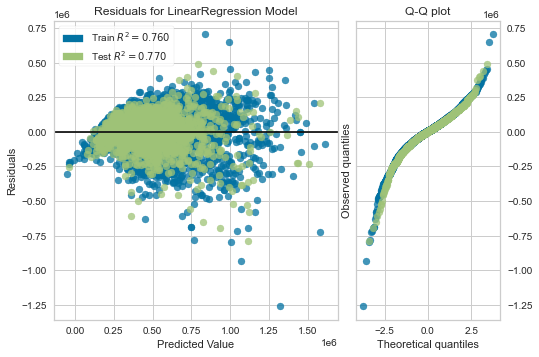

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [124]:
visualizer = ResidualsPlot(lr, hist=False, qqplot=True)
visualizer.fit(X_train_poly_sc, y_train5)  # Fit the training data to the visualizer
visualizer.score(X_test_poly_sc, y_test5)  # Evaluate the model on the test data
visualizer.show()

In [125]:
# The predicted values of the second model are  better than the baseline model but still not equally scattered,
# has a cone shape, so it is heteroscedastic

In [126]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# Build step forward feature selection
sfs1 = sfs(lr,k_features = 15,forward=True,floating=False, scoring='r2',cv=5,n_jobs=-1,verbose=2)
# Perform SFFS
sfs1 = sfs1.fit(X_train_poly_sc, y_train5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 113 out of 136 | elapsed:    3.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:    3.6s finished

[2022-03-21 18:35:33] Features: 1/15 -- score: 0.34784789195472693[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 112 out of 135 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.5s finished

[2022-03-21 18:35:33] Features: 2/15 -- score: 0.5863443664129504[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 111 out of 134 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    0.5s fin

In [127]:
# I used step forward feature selection to check if dropped any feature will make R2 better, but it didn't


# Third Model

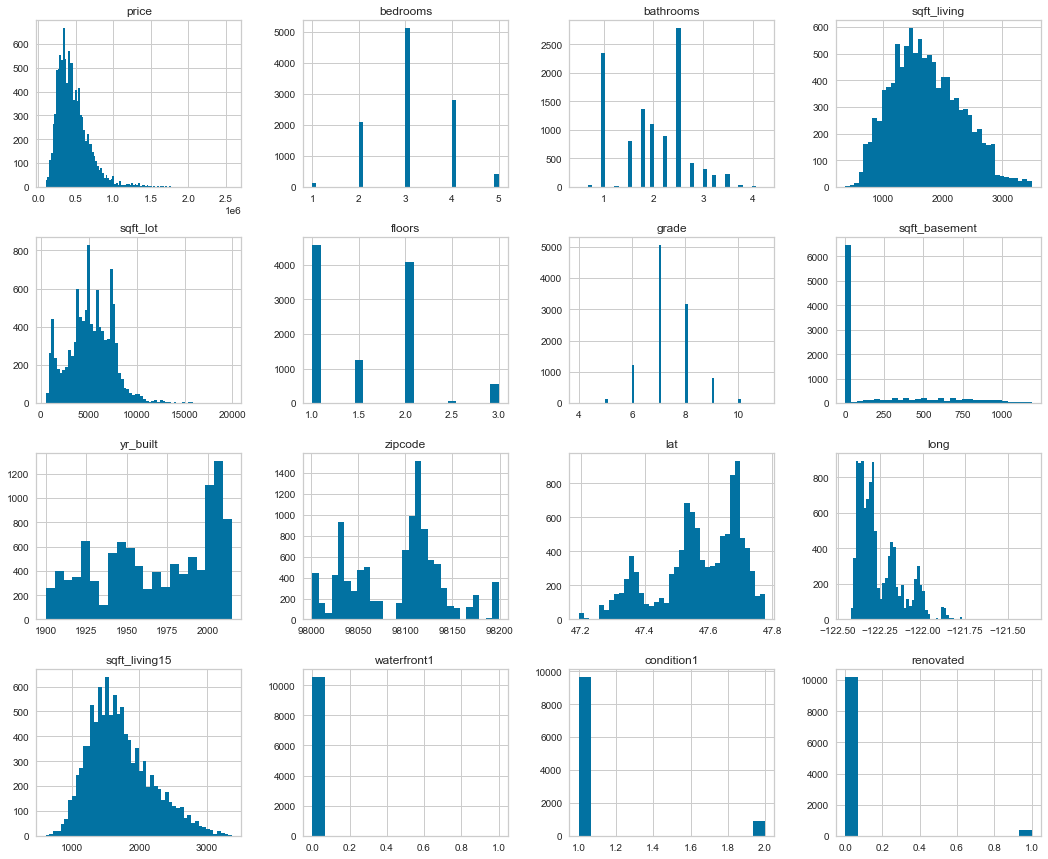

In [128]:
# check all variables shape of distribution by using histogram
fig = plt.figure(figsize = (18,15))
ax = fig.gca()
df.hist(ax = ax, bins='auto');

In [129]:
# price, sqft_living, sqft_living15, are all continuous and almost normally distributed.
# sqft_lot, lat, long are all continuous but not normally distributed
# the not renovated percentage is way higher than the renovated, same apply for waterfront
# bedrooms, bathrooms, floors, condition, grade,yr_built are all had ordinal values


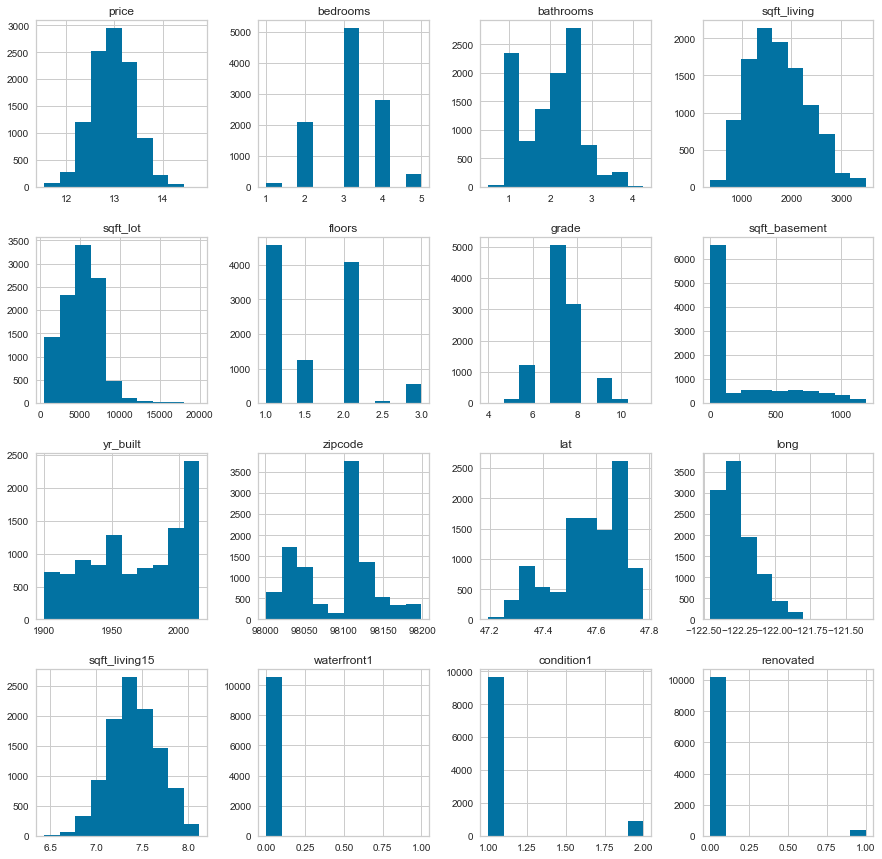

In [130]:
# Try log transform with every feature, but it only worked with the price and 'sqft_living15',
# now price and 'sqft_living15' distribution are way better
df4 = df.copy()
df4['price'] = np.log1p(df4['price'])
df4['sqft_living15'] = np.log1p(df4['sqft_living15'])
df4.hist(figsize  = [15, 15]);

In [131]:
#one hot encode Zip code


In [132]:
#df4["zipcode"] = pd.get_dummies(df4["zipcode"], columns="zipcode", drop_first=False)


In [133]:
#min max scale binary data
df4["waterfront1"]=(df4["waterfront1"] - min(df4["waterfront1"])) /(max(df4["waterfront1"]) - min(df4["waterfront1"]))
df4["renovated"] = (df4["renovated"] - min(df4["renovated"])) / (max(df4["renovated"]) - min(df4["renovated"]))

In [134]:
X2 = df4.drop('price', axis=1)
y2 = df4['price']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Instantiate a linear regression model
lr2 = LinearRegression()
# Fit our model on our normalized data
lr2.fit(X_train2, y_train2)
y_train_pred2 = lr2.predict(X_train2)
y_test_pred2 = lr2.predict(X_test2)

In [135]:
# Evaluate
ut.evaluate_model(y_train2, y_test2, y_train_pred2, y_test_pred2)


Train R2: 0.722
Test R2: 0.733
---
Train MAE: 0.176
Test MAE: 0.176
---
Train RMSE: 0.227
Test RMSE: 0.228


In [136]:
# after log transformation, the model can predict 62 % variance in the price and approximately $0.19 off(MAE), 
# and $0.22(RMSE)

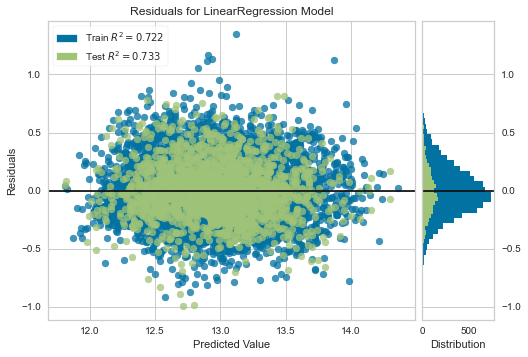

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [137]:
visualizer = ResidualsPlot(lr2)

visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
visualizer.show()

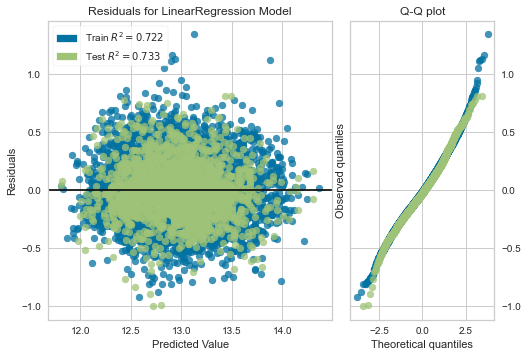

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [138]:
visualizer = ResidualsPlot(lr2, hist=False, qqplot=True)
visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
visualizer.show()

In [139]:
#The predicted values of the this model are equally scattered which achieve Homoscedasticity Assumption.



# Final Model

In [140]:
X6 = df4.drop('price', axis=1)
y6 = df4['price']

X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.2, random_state=42)


In [141]:
from sklearn.preprocessing import PolynomialFeatures

# Instantiate PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=False)

# Fit and transform X_train
X_poly_train = poly.fit_transform(X_train6)

# Instantiate and fit a linear regression model and normalize it to the polynomial transformed train features
reg_poly = LinearRegression(normalize=True).fit(X_poly_train, y_train6)

# Transform the test data into polynomial features
X_poly_test = poly.transform(X_test6)

# Get predicted values for transformed polynomial test data  
y_pred = reg_poly.predict(X_poly_test)

# Transform the full data
X_poly = poly.transform(X_train6)

# Now, we want to see what the model predicts for the entire data  
y_poly = reg_poly.predict(X_poly)

In [142]:
ut.evaluate_model(y_train6, y_test6, y_poly, y_pred)


Train R2: 0.771
Test R2: 0.771
---
Train MAE: 0.157
Test MAE: 0.160
---
Train RMSE: 0.206
Test RMSE: 0.211


In [143]:
#this model can predict 73 % variance in the price and approximately $0.16 off(MAE),and $0.22 0ff (RMSE) 
#not all the data have perfect linaer realthion with the price


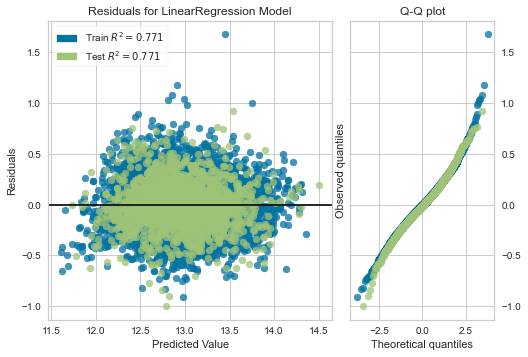

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [144]:
visualizer = ResidualsPlot(reg_poly, hist=False, qqplot=True)
visualizer.fit(X_poly_train, y_train6)  # Fit the training data to the visualizer
visualizer.score(X_poly_test, y_test6)  # Evaluate the model on the test data
visualizer.show()

In [145]:
#The predicted values of the this model are equally scattered which achieve Homoscedasticity Assumption.


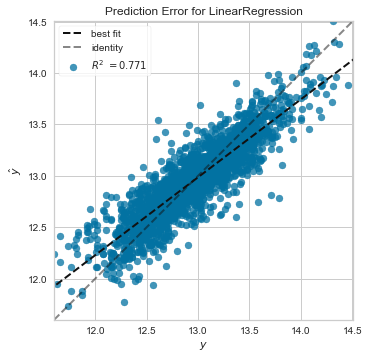

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [146]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(reg_poly, bestfit= True, is_fitted='auto') 
visualizer.fit(X_poly_train, y_train6) 
visualizer.score(X_poly_test, y_test6) 
visualizer.show()

In [147]:
# "The prediction error visualizer plots the actual (measured) vs. expected (predicted) values against each other.
#The dotted black line is the less than 45 degree line that indicates error approching zero"
# https://buildmedia.readthedocs.org/media/pdf/yellowbrick/develop/yellowbrick.pdf 

In [148]:
# look at the coefficients with the names of each col
pd.DataFrame.from_dict(dict(zip(X6, reg_poly.coef_)), orient='index')[0].sort_values(ascending= False)

sqft_living15    6.674927e+02
long             1.947252e+02
bathrooms        4.611453e+01
sqft_living      1.726830e+01
zipcode          6.024535e-01
condition1       6.219759e-02
floors           1.296813e-02
bedrooms        -9.912057e-11
yr_built        -3.687360e-02
sqft_lot        -1.022184e-01
lat             -2.565942e-01
renovated       -3.868146e+00
grade           -4.417890e+00
sqft_basement   -1.254884e+01
waterfront1     -1.595438e+01
Name: 0, dtype: float64

In [149]:
#check for multicollinearity

# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df8=df4.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df8['pairs'] = list(zip(df8.level_0, df8.level_1))

# set index to pairs
df8.set_index(['pairs'], inplace = True)

#d rop level columns
df8.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df8.columns = ['cc']

# drop duplicates.
df8.drop_duplicates(inplace=True)
df8.head()


,cc
pairs,
"(price, price)",1.000000
"(sqft_living, bathrooms)",0.674282
"(sqft_living15, sqft_living)",0.665396
"(zipcode, long)",0.643643
"(bedrooms, sqft_living)",0.620960


In [150]:
from sklearn.preprocessing import PolynomialFeatures

# Instantiate PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=False)

# Fit and transform X_train
X_poly_train = poly.fit_transform(X_train6)

# Instantiate and fit a linear regression model to the polynomial transformed train features
reg_poly1 = LinearRegression().fit(X_poly_train, y_train6)

# Transform the test data into polynomial features
X_poly_test = poly.transform(X_test6)

# Get predicted values for transformed polynomial test data  
y_pred = reg_poly.predict(X_poly_test)

# Transform the full data
X_poly = poly.transform(X_train6)

# Now, we want to see what the model predicts for the entire data  
y_poly = reg_poly.predict(X_poly)


In [151]:
# look at unscaled  coefficients with the names of each col
pd.DataFrame.from_dict(dict(zip(X6, reg_poly1.coef_)), orient='index')[0].sort_values(ascending= False)


sqft_living15    667.492651
long             194.725151
bathrooms         46.114552
sqft_living       17.268315
zipcode            0.602454
floors             0.012968
bedrooms           0.002208
condition1         0.001108
yr_built          -0.036874
sqft_lot          -0.102218
lat               -0.256594
renovated         -0.769890
grade             -4.417896
sqft_basement    -12.548843
waterfront1      -15.954365
Name: 0, dtype: float64

## Interpret:
### Feature Importances
Each positive coefficient of the model give the anticipated change in the sale, so for a one-unit increase in the independent variable A positive coefficient show a positive correlation relationship. As the feauture increases, the price increases. While the negative coffient indicate that the price decreases as the independent variable decreases


- From the above features' coefficient, we can see that the most strongest feature is longitude in the first place, and the latitude in the third place, which means that the price is highly correlated with the location of the house

- The square footage of interior housing living space for the nearest 15 neighbors come in the second place, and the square footage of living space in the 4th place, which means the living space of a house and the nearest 15 neighbors are also highly correlated with the price



## 1. Is there any relationship between the house’s location and its sale price?




The predicted price will increase with the increase in latitude and decrease in longitude and as the location move to the lower northwest with few scattered houses in the middle to east. These will help the buyer to get an estimate of the housing price range based on the location, and their allocated budget.

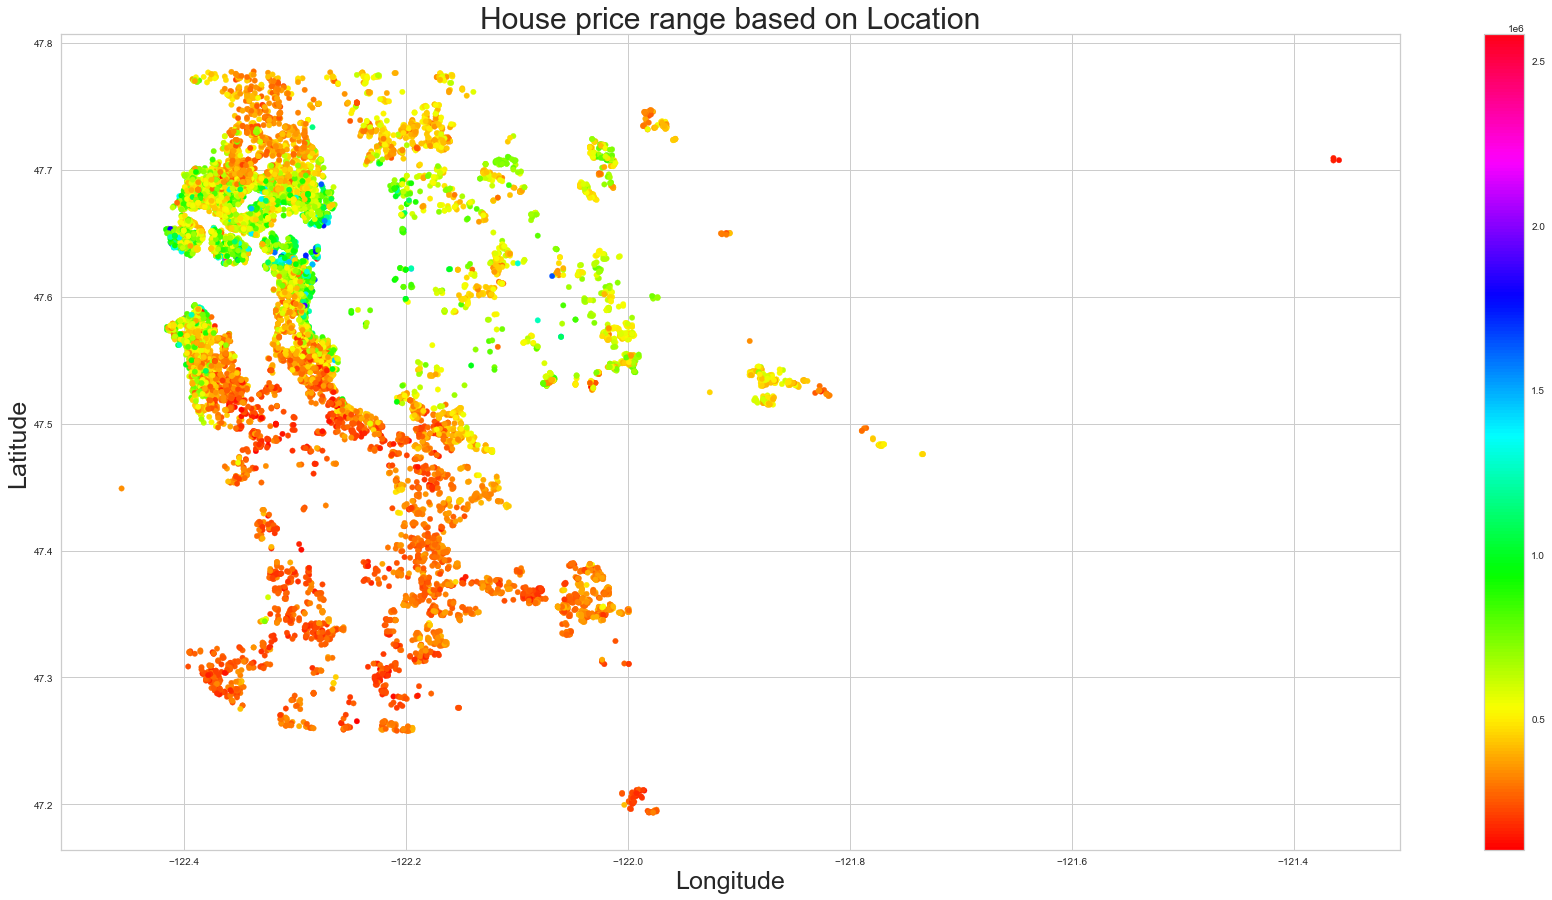

In [152]:
# Visualizing Longitude to Latitude to check how the price vary by location
plt.figure(figsize= (30, 15))
plt.scatter(x=df4['long'], y=df['lat'], c=df['price'], cmap='hsv', marker='o',s=30)
plt.title('House price range based on Location',fontsize=30)
plt.xlabel('Longitude',fontsize=25)
plt.ylabel('Latitude',fontsize=25)
plt.colorbar()
plt.savefig("images/HousepricebasedonLocation.png")
plt.show;

## 2. What are the top ten zip codes that have the highest selling houses in King County?


After looking up the corresponding cities to each zip code, the top ten selling cities in terms of the price mean are Bellevue, Seattle, Mercer Island, Cottage Lake, Maltby, Union Hill-Novelty Hill, Sammamish.

In [153]:
# group by zipcode and get the mean of prices in a zipcode
top_ten= df.groupby('zipcode')['price'].mean().sort_values(ascending=False).head(10).head(10)
top_ten.head(20)

zipcode
98004    876144.950000
98112    852622.015385
98109    790953.826531
98119    770200.748503
98040    765300.000000
98102    738225.533333
98105    730829.549451
98077    705000.000000
98075    678133.288462
98199    675472.112450
Name: price, dtype: float64

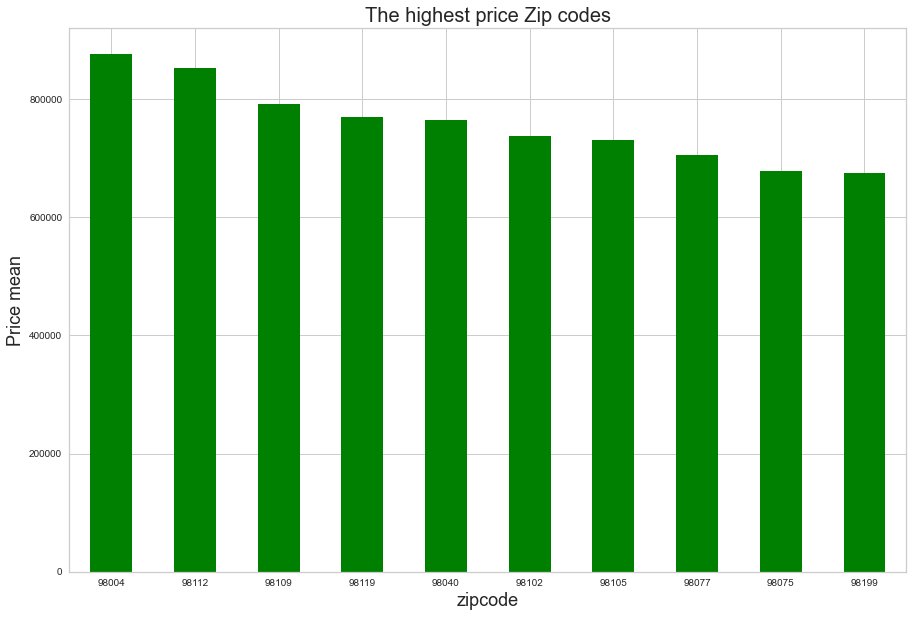

In [154]:
# plot top 10 highest house price as reported by zipcode
fig = top_ten.plot(kind = 'bar',color='green', figsize=(15,10))
plt.title('The highest price Zip codes',fontsize=20)
plt.xlabel('zipcode',fontsize=18)
plt.ylabel('Price mean',fontsize=18)
plt.xticks(rotation=0);
plt.savefig("images/The highest price zipcode.png")
plt.show()

### 3. What are the top ten affordable zip codes in King County?
After looking up the corresponding cities to each zip code, the most affordable cities in terms of the price mean are Tukwila, Auburn, Numclaw, Wabash, Birch, Krain, Cumberland, Bayne, Osceola, Maywood, Upper Mill, Bayne Junction, Boise, Veazie, Naco, Stampede,Kent, Lakeland North, Black Diamond, Franklin, and more



In [155]:
# group by zipcode and get the mean of prices in a zipcode
top_ten= df.groupby('zipcode')['price'].mean().sort_values(ascending=True).head(10).head(10)
top_ten.head(20)


zipcode
98168    226001.785714
98002    230308.966942
98022    238203.108696
98032    241882.044444
98010    244655.000000
98023    259351.428571
98198    261387.270270
98001    270265.829630
98014    270400.000000
98003    272020.265957
Name: price, dtype: float64

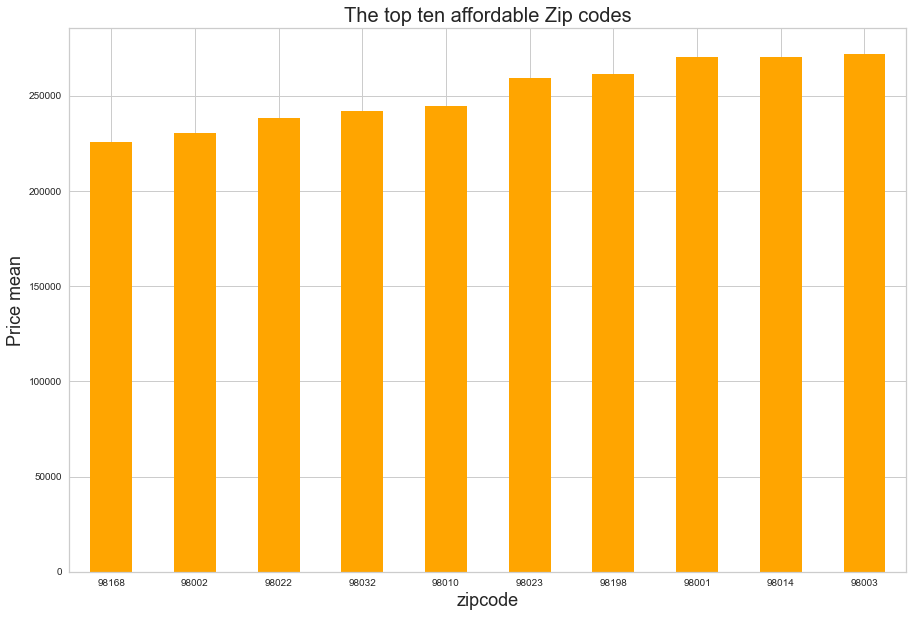

In [156]:
# plot top 10 lowest house price as reported by zipcode
fig = top_ten.plot(kind = 'bar',color='orange', figsize=(15,10))
plt.title('The top ten affordable Zip codes',fontsize=20)
plt.xlabel('zipcode',fontsize=18)
plt.ylabel('Price mean',fontsize=18)
plt.xticks(rotation=0);
plt.savefig("images/The top ten affordable zipcode.png")
plt.show()

### 4. Which features are important to predict the price of the house?

<Figure size 1440x1440 with 0 Axes>

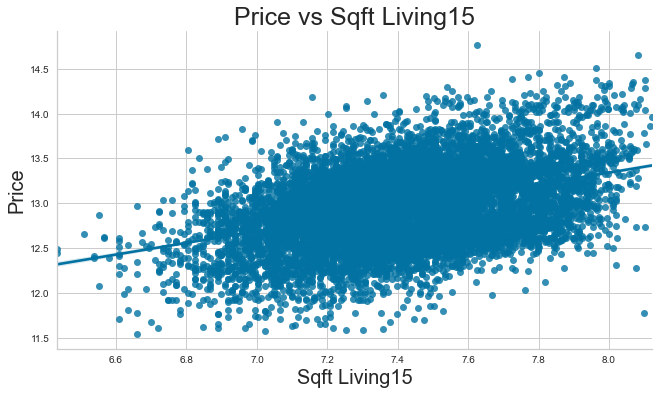

In [157]:
plt.figure(figsize = (20,20));
sqf=sns.lmplot(x="sqft_living15", y="price",aspect=1.8,data=df4)
plt.title("Price vs Sqft Living15",fontsize=25)
sqf.set_xlabels("Sqft Living15",fontsize=20)
sqf.set_ylabels("Price",fontsize=20)
plt.show();

<Figure size 1440x1440 with 0 Axes>

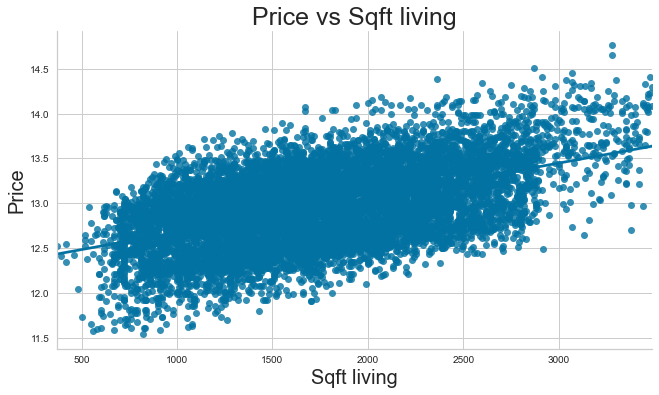

In [158]:
plt.figure(figsize = (20,20));
sqf=sns.lmplot(x="sqft_living", y="price",aspect=1.8,data=df4)
plt.title("Price vs Sqft living",fontsize=25)
sqf.set_xlabels("Sqft living",fontsize=20)
sqf.set_ylabels("Price",fontsize=20)
plt.show();

<Figure size 1440x1440 with 0 Axes>

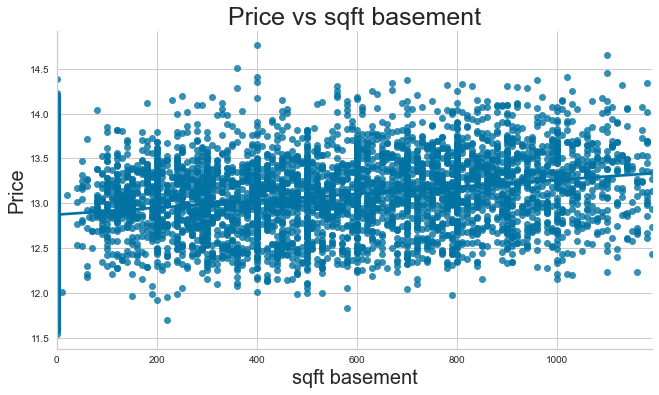

In [159]:
plt.figure(figsize = (20,20));
sqf=sns.lmplot(x="sqft_basement", y="price",aspect=1.8,data=df4)
plt.title("Price vs sqft basement",fontsize=25)
sqf.set_xlabels("sqft basement",fontsize=20)
sqf.set_ylabels("Price",fontsize=20)
plt.show();

<Figure size 1440x1440 with 0 Axes>

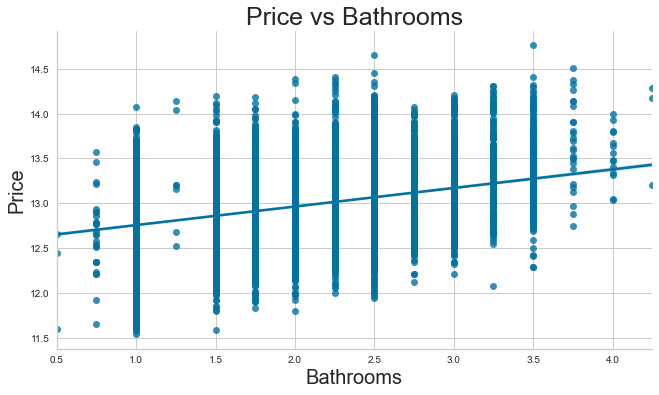

In [160]:
plt.figure(figsize = (20,20));
sqf=sns.lmplot(x="bathrooms", y="price",aspect=1.8,data=df4)
plt.title("Price vs Bathrooms",fontsize=25)
sqf.set_xlabels("Bathrooms",fontsize=20)
sqf.set_ylabels("Price",fontsize=20)
plt.show();

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

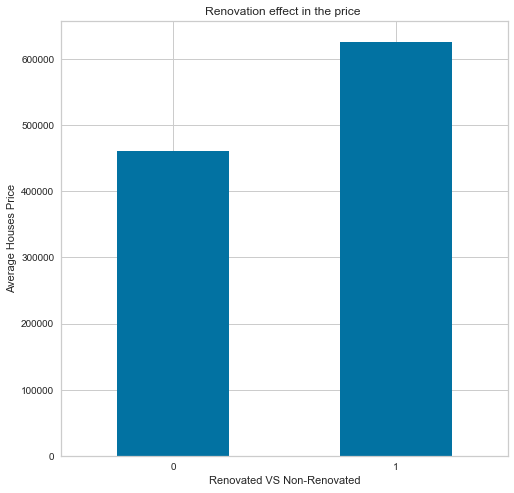

In [161]:
# plotting houses to the mean of price
df.groupby("renovated")["price"].mean().plot(kind="bar",figsize=(8,8));
plt.title("Renovation effect in the price ")
plt.ylabel("Average Houses Price")
plt.xlabel("Renovated VS Non-Renovated")
plt.xticks(rotation=0)
#the renovated houses selling price is higher than non-renovated one 

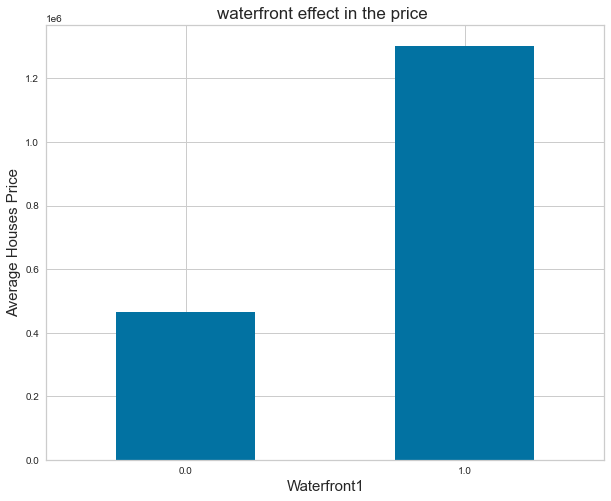

In [162]:
# plotting houses to the mean of price
df.groupby("waterfront1")["price"].mean().plot(kind="bar",figsize=(10,8));
plt.title("waterfront effect in the price ", fontsize=17)
plt.ylabel("Average Houses Price",fontsize=15)
plt.xlabel("Waterfront1",fontsize=15)
plt.xticks(rotation=0)
plt.show()
#the houses with waterfront selling price are higher than one without waterfront


<Figure size 1440x1440 with 0 Axes>

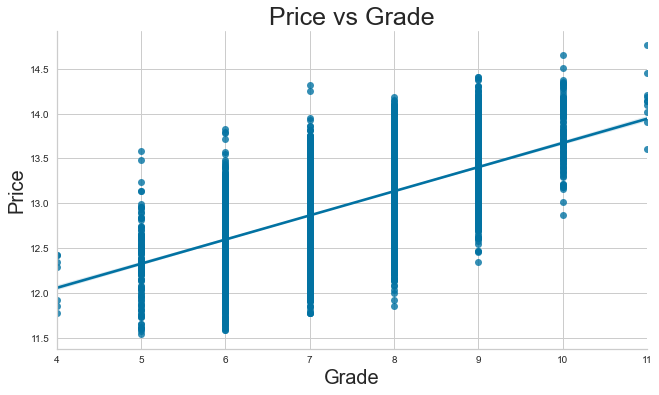

In [163]:
plt.figure(figsize = (20,20));
sqf=sns.lmplot(x="grade", y="price",aspect=1.8,data=df4)
plt.title("Price vs Grade",fontsize=25)
sqf.set_xlabels("Grade",fontsize=20)
sqf.set_ylabels("Price",fontsize=20)
plt.show();

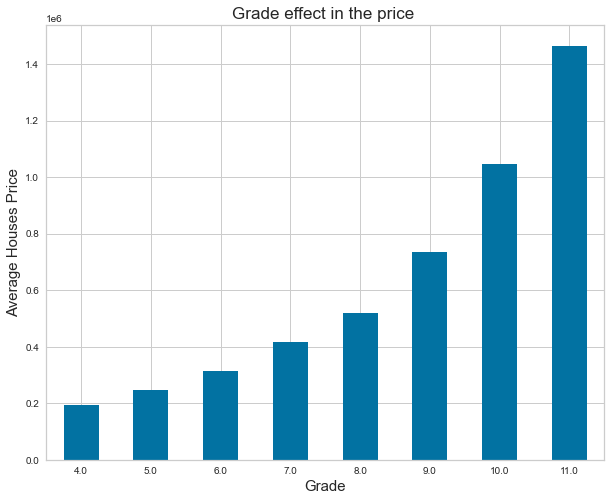

In [164]:
# plotting houses to the mean of price
df.groupby("grade")["price"].mean().plot(kind="bar",figsize=(10,8));
plt.title("Grade effect in the price ", fontsize=17)
plt.ylabel("Average Houses Price",fontsize=15)
plt.xlabel("Grade",fontsize=15)
plt.xticks(rotation=0)
plt.show()
#the houses with waterfront selling price are higher than one without waterfront


### Conclusions


- I organized my notebook by using OSMEN data science method to deal with the king county dataset.


- I cleaned the data, removed the null values, limit each feature of the data to get rid of the outlier as much as possible, and checked for Multicollinearity.


- For the baseline model, I train test split the data using scikit-learn and scaled it using the standardized scaler, and got a R2 score of 0.66, for the Normality assumption the residuals were heteroscedastic.


- For the second model, I train test split the data using scikit-learn, Polynomial Regression, MinMaxScaler, and got a R2 score of 0.75, for Normality assumption the residuals were still heteroscedastic, I also used step forward feature selection to check if dropped any feature will make the R2 better, but it didn't.


- For the third model, I logged transform price and 'sqft_living15, one hot encode zip code, min-max scale binary data (waterfront and renovated). Train test split the data using sci-kit-learn, and got a R2 score of 0.72. For the normality assumption, the residuals were homoscedastic and the QQ plot looks good.


- For the Final mode, I copied the same data from the third model before test split, then train test split the data using scikit-learn, use polynomial regression, scaled it to be able to interpret the coefficients, and got a R2 score of 0.76, for the normality assumption the residuals were homoscedastic and the QQ plot looks good, checked for multicollinearity. after that unscaled it to be able to see how each unit of each features impacts the price.

- 15 features were included in the final model to get the best prediction, The following findings are from the features with the highest coefficients:

- The price of the house is highly affected by its location.

- Houses with larger living space, bigger basement, and more bathrooms have higher predicted price.

- The renovated houses selling price is higher than non-renovated one

- The houses with waterfront have higher selling prices than the ones without one.

- Each increase of the grade will increase the price, with grade 11 in the top


### Limitaion

- The size of the dataset, a lot of features don't have a linear relationship with the target. Maybe a different non-linear model would work better.

### Future work


Use APIs to get King county school district data and link it with the zip codes.
